In [1]:
%load_ext autoreload
%autoreload 2

In [126]:
import random
from pathlib import Path

import timm
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

In [4]:
model = timm.create_model('resnet50', pretrained=True)

# Create model-specific transform
transform = timm.data.create_transform(
    **timm.data.resolve_data_config(model.pretrained_cfg)
)

In [5]:
transform

Compose(
    Resize(size=235, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [177]:
# dataset = torchvision.datasets.OxfordIIITPet("data", split="trainval", transform=transform, download=True)
dataset_train = torchvision.datasets.OxfordIIITPet("data", split="trainval", download=True)
dataset_test = torchvision.datasets.OxfordIIITPet("data", split="test")

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: data

In [182]:
assert dataset_train.classes == dataset_test.classes

## Train dataset

In [184]:
dataset_train

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: data

Summary Statistics:
Number of Classes: 37
Total Number of Images: 3680
Mean Images per Class: 99.45945945945945
Standard Deviation of Images per Class: 1.5350780347203163


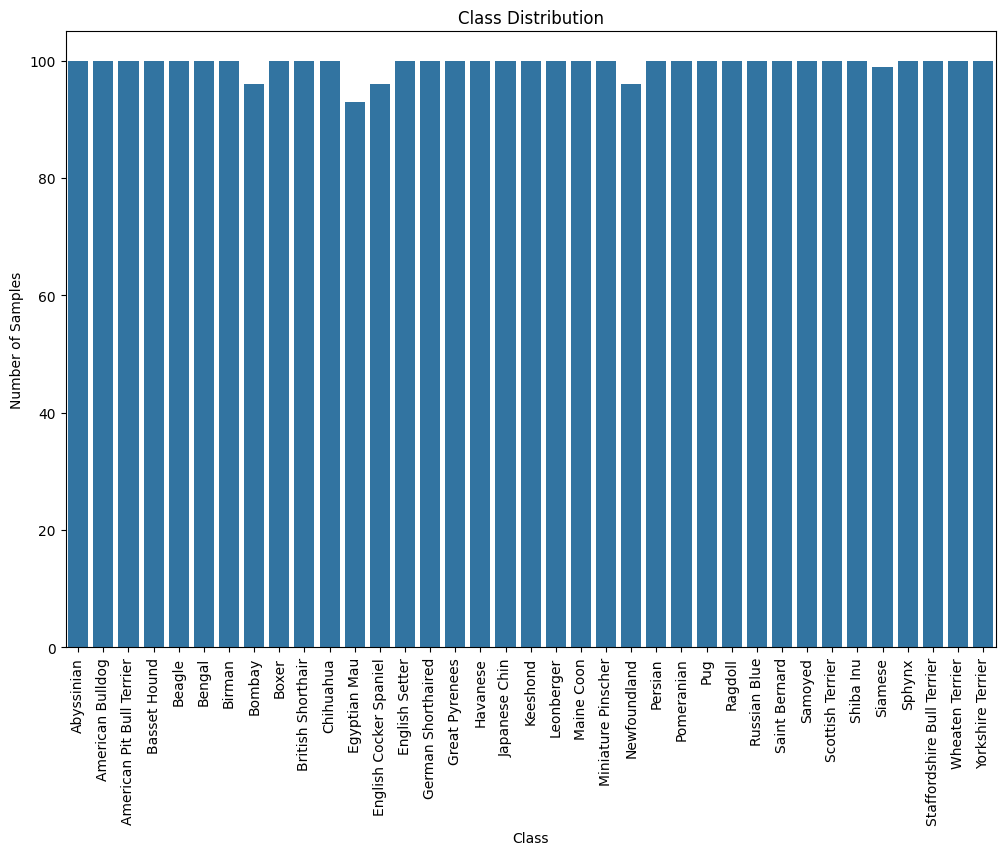

In [178]:
# Display class distribution and summary statistics

from utils import compute_summary_statistics, display_summary_statistics, get_class_distribution

class_distribution = get_class_distribution(dataset_train)
summary_statistics = compute_summary_statistics(class_distribution)
display_summary_statistics(summary_statistics, class_distribution)

## Test dataset

In [183]:
dataset_test

Dataset OxfordIIITPet
    Number of datapoints: 3669
    Root location: data

Summary Statistics:
Number of Classes: 37
Total Number of Images: 3669
Mean Images per Class: 99.16216216216216
Standard Deviation of Images per Class: 2.6253804204499227


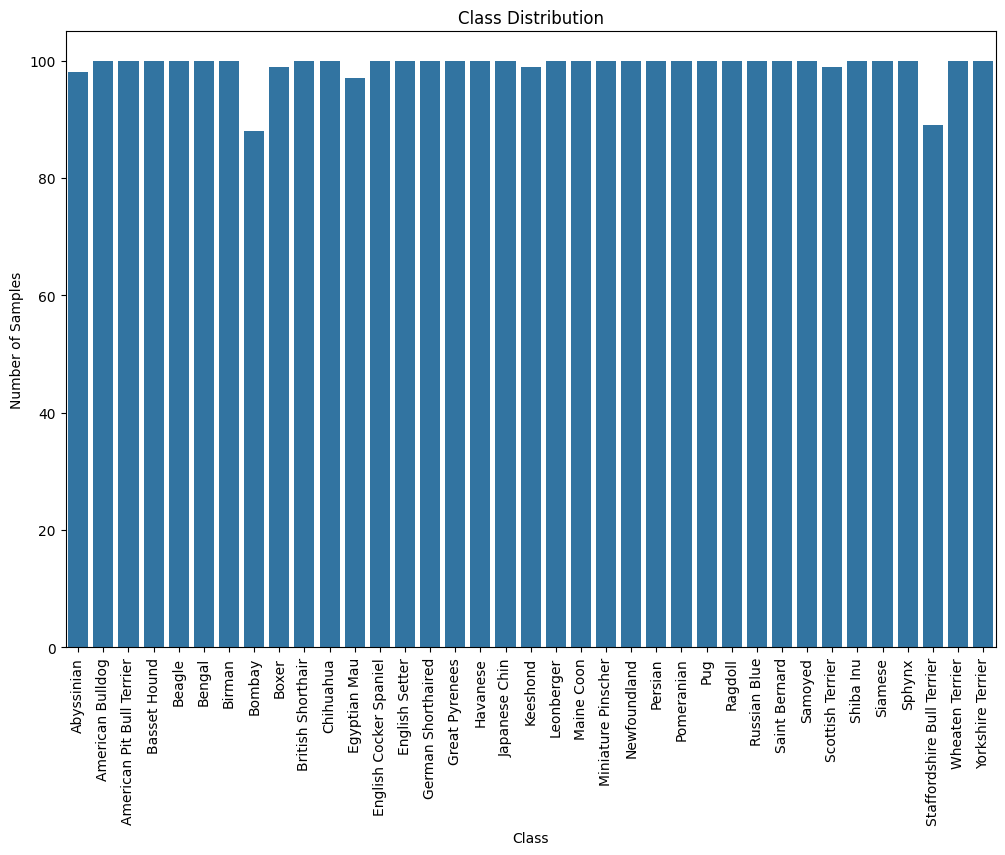

In [180]:
# Display class distribution and summary statistics

from utils import compute_summary_statistics, display_summary_statistics, get_class_distribution

class_distribution = get_class_distribution(dataset_test)
summary_statistics = compute_summary_statistics(class_distribution)
display_summary_statistics(summary_statistics, class_distribution)

Siamese


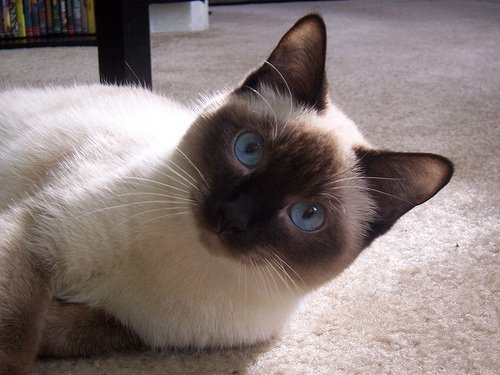

In [164]:
# Show random images from the dataset

ix = random.randint(0, len(dataset_train))
img, cls = dataset_train[ix]

print(dataset_train.classes[cls])
img